In [1]:
from occultence import *

(0.99, 1.015)

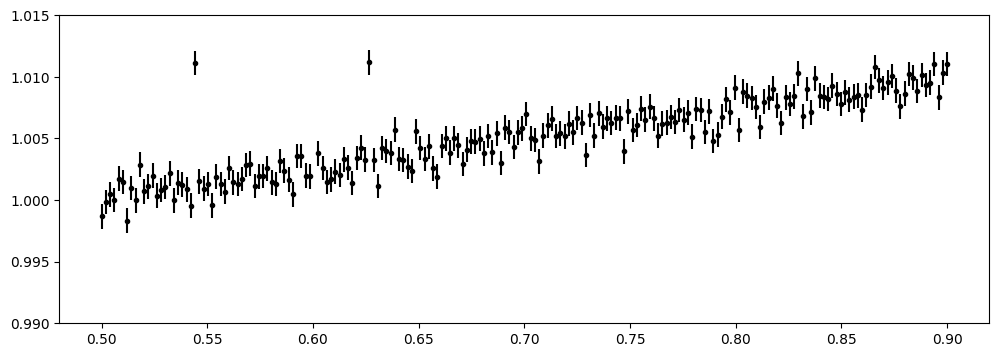

In [2]:
t = np.linspace(0.5,0.9,200)
ferr = 1e-3 * np.ones(len(t))
f = 1 + (ferr * (np.random.randn(len(t))))
f[22] = 1.01 # add a cosmic
f[63] = 1.008 # add a cosmic
f[50] = 0.0 # add a zero flux point
# f[100:120] *= 0.995 # add a transit
f *= np.linspace(1,1.01, len(t)) # add a linear trend for the GP to remove
plt.figure(figsize=(12,4))
plt.errorbar(t,f,ferr,fmt='k.')
plt.ylim(0.99,1.015)

In [3]:
targ = LightCurve(name = "test",
                  time = t,
                  flux = f,
                  uncertainty = np.abs(ferr),
                 metadata={'R_star':0.1*u.R_sun, 'M_star':0.1*u.M_sun})

🌈🤖 Warning! The time array is not an astropy.Time object, therefore there is no info about the 
format or scale.
We will assume that it is JD and TDB from here on!



In [4]:
targ_with_transit = targ.inject_transit(per=5*u.d, epoch=0.2 * u.d, inc=90 * u.degree, rp=1 * u.R_earth, ld=[0.3,0.3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Time [d]', ylabel='Flux'>

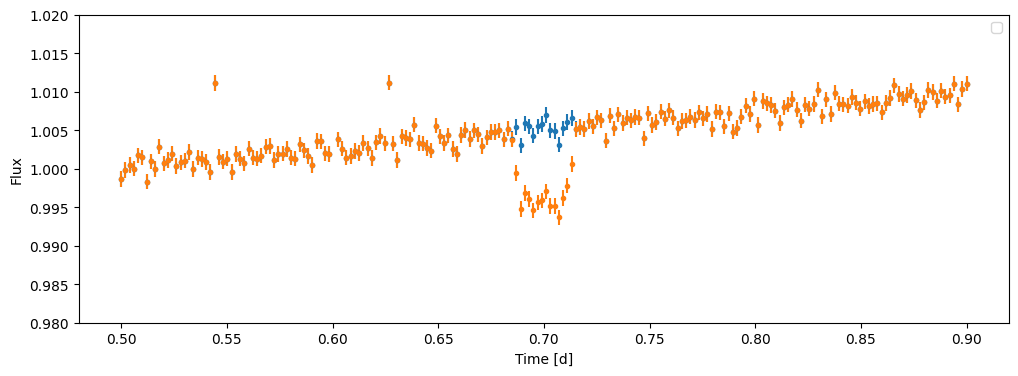

In [5]:
ax=targ.plot()
targ_with_transit.plot(ax=ax)

In [6]:
targ_with_transit.metadata

{'name': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 5. d>],
  'epoch': [<Quantity 0.7 d>],
  'inc': [<Quantity 90. deg>],
  'rp': [<Quantity 1. earthRad>],
  'ld': [[0.3, 0.3]],
  'depth': [<Quantity 0.00840502>],
  'duration': [<Quantity 0.03042218 d>]}}

In [7]:
planets = targ_with_transit.create_lots_of_transit_params(nfake=10000, 
                                                          minimum_planet_radius=0.5 * u.R_earth, maximum_planet_radius=3 * u.R_earth,
                                                          minimum_period=0.5 * u.d, maximum_period=1 * u.d,)

In [8]:
planets

,logP,phase,cosi,r_p,depth,duration,epoch,recovered,log_Prec,rec_depth,rec_duration,rec_epoch,run,snr,target,r_s,m_s,teff,spt
0,-0.129325,0.761267,0.009542,1.794890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
1,-0.013442,0.909548,0.004753,2.300298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
2,-0.033175,0.936866,0.009071,2.065769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
3,-0.036093,0.661233,0.003735,2.043773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
4,-0.175231,0.692138,0.004706,1.149885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.118210,0.238305,0.012774,0.673302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
9996,-0.208566,0.826522,0.003424,1.900269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
9997,-0.237298,0.133471,0.006623,2.827805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None
9998,-0.193088,0.842694,0.016763,0.706090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,test,0.1 solRad,0.1 solMass,None,None


In [10]:
lcs_with_transits = targ.inject_lots_of_transits(nfake=10, pool=False, 
                             minimum_planet_radius=0.5 * u.R_earth, maximum_planet_radius=3 * u.R_earth,
                             minimum_period=0.5 * u.d, maximum_period=1 * u.d,)
lcs_with_transits

[<🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>,
 <🌟 Lightcurve test (200t) 🌟>]

In [11]:
# lcs_with_transits = []
# for logp, phase, cosi, rp in zip(planets['logP'], planets['phase'], planets['cosi'], planets['r_p']):
#     lcs_with_transits.append(targ.inject_transit(10**logp*u.d, phase*(10**logp)*u.d, math.acos(cosi)*u.radian, rp*u.R_earth, ld=[0.3,0.3]))

In [12]:
len(lcs_with_transits)

10

In [13]:
lcs_with_transits[0].metadata

{'name': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 0.56033947 d>],
  'epoch': [<Quantity 0.65742753 d>],
  'inc': [<Quantity 1.55638523 rad>],
  'rp': [<Quantity 0.70750174 earthRad>],
  'ld': [[0.385, 0.304]],
  'depth': [<Quantity 0.0042072>],
  'duration': [<Quantity 0.01408948 d>]}}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

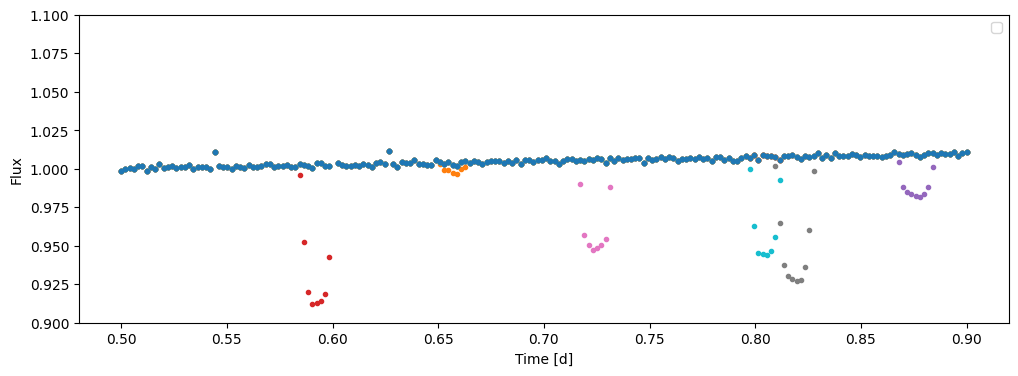

In [14]:
ax=targ.plot()
for lc in lcs_with_transits[:10]:
    lc.plot(ax=ax, ylims=[0.9,1.1])

In [14]:
# pool = mp.Pool(5)
# lcs = pool.starmap(inject_transit, [(targ, (10**logp) * u.d, phase * 10**logp * u.d, math.acos(cosi) * u.radian,
#                                               rp * u.R_earth, [0.1,0.1]) for
#                                              logp, phase, cosi, rp in zip(planets['logP'], planets['phase'], planets['cosi'],
#                                                                           planets['r_p'])])

Process SpawnPoolWorker-32:
Traceback (most recent call last):
  File "/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
  File "/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/occultence/lightcurve/make_lightcurve.py", line 285, in __getattr__
    if key not in self._core_dictionaries:
  File "/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/occultence/lightcurve/make_lightcurve.py", line 285, in __getattr__
    

KeyboardInterrupt: 